In [228]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import KFold
import lightgbm as lgb
from sklearn.metrics import accuracy_score

In [229]:
train = pd.read_csv('PJT002_train.csv')
val = pd.read_csv('PJT002_validation.csv')
test = pd.read_csv('PJT002_test.csv')
sub = pd.read_csv('PJT002_submission.csv')
data = pd.concat([train, val])

In [230]:
train.head()

,dt_of_fr,fr_yn,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,...,no_tbc_zn_dstnc,bldng_cnt_in_50m,trgt_crtr,fr_fghtng_fclt_spcl_css_5_yn,fr_fghtng_fclt_spcl_css_6_yn,us_yn,dngrs_thng_yn,slf_fr_brgd_yn,blk_dngrs_thng_mnfctr_yn,cltrl_hrtg_yn
0,2017-10-20 05:54,Y,단독주택,블록구조,3,69.42,69.42,0.0,1977,1.0,...,88,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-09-30 08:26,N,NaN,NaN,3,46.29,46.29,0.0,NaN,1.0,...,7727,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-10-30 14:57,Y,공동주택,철근콘크리트구조,1,583.80,2516.76,1446.0,2.00011e+07,5.0,...,72,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-06-14 05:23,N,단독주택,일반목구조,2,48.92,48.92,0.0,1936,1.0,...,508,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-04-22 05:38,N,NaN,NaN,2,0.00,0.00,0.0,NaN,NaN,...,707,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [231]:
train['dt_of_athrztn'].fillna(9999,inplace  = True)

In [232]:
train['dt_of_athrztn'] = train['dt_of_athrztn'].astype(str,inplace = True)

In [233]:
train['dt_of_athrztn']=train['dt_of_athrztn'].str[:4]

In [234]:
train['dt_of_athrztn'] = train['dt_of_athrztn'].astype(int,inplace = True)

In [235]:
len(train['dt_of_athrztn'].unique())

172

In [236]:

bins = np.linspace(1600,2019, 20)
train['dt_of_athrztn'] = np.digitize(train['dt_of_athrztn'], bins)


In [237]:
val['dt_of_athrztn'].fillna(9999,inplace  = True)

val['dt_of_athrztn'] = val['dt_of_athrztn'].astype(str,inplace = True)

val['dt_of_athrztn']=val['dt_of_athrztn'].str[:4]

val['dt_of_athrztn'] = val['dt_of_athrztn'].astype(int,inplace = True)

len(val['dt_of_athrztn'].unique())

bins = np.linspace(1600,2019, 20)
val['dt_of_athrztn'] = np.digitize(val['dt_of_athrztn'], bins)

test['dt_of_athrztn'].fillna(9999,inplace  = True)

test['dt_of_athrztn'] = test['dt_of_athrztn'].astype(str,inplace = True)

test['dt_of_athrztn']=test['dt_of_athrztn'].str[:4]

test['dt_of_athrztn'] = test['dt_of_athrztn'].astype(int,inplace = True)

len(test['dt_of_athrztn'].unique())
bins = np.linspace(1600,2019, 20)
test['dt_of_athrztn'] = np.digitize(test['dt_of_athrztn'], bins)

In [238]:
train.groupby('dt_of_athrztn').count()

,dt_of_fr,fr_yn,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,ttl_grnd_flr,ttl_dwn_flr,...,no_tbc_zn_dstnc,bldng_cnt_in_50m,trgt_crtr,fr_fghtng_fclt_spcl_css_5_yn,fr_fghtng_fclt_spcl_css_6_yn,us_yn,dngrs_thng_yn,slf_fr_brgd_yn,blk_dngrs_thng_mnfctr_yn,cltrl_hrtg_yn
dt_of_athrztn,,,,,,,,,,,,,,,,,,,,,
3,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,0
7,3,3,3,3,3,3,3,3,3,2,...,3,3,0,2,2,2,2,2,2,2
9,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,0
10,10,10,10,10,10,10,10,10,10,10,...,10,10,1,0,0,1,1,1,1,1
11,3,3,3,3,3,3,3,3,3,3,...,3,3,0,0,0,0,0,0,0,0
12,12,12,12,12,12,12,12,12,12,11,...,12,12,0,0,0,0,0,0,0,0
13,51,51,50,51,51,51,51,51,47,44,...,51,51,2,2,2,3,3,3,3,3
14,203,203,203,202,203,203,203,203,193,193,...,203,203,10,15,15,15,15,15,15,15
15,1021,1021,1015,1016,1021,1021,1021,1021,970,962,...,1021,1021,41,42,42,48,48,48,48,48


In [239]:
test = test.drop(['fr_yn'],1)

In [240]:
data['dt_of_fr'] = pd.to_datetime(data['dt_of_fr'])
train['dt_of_fr'] = pd.to_datetime(train['dt_of_fr'])
val['dt_of_fr'] = pd.to_datetime(val['dt_of_fr'])
test['dt_of_fr'] = pd.to_datetime(test['dt_of_fr'])



In [241]:
categorical_cols1 = train.select_dtypes(['object']).columns
for col in categorical_cols1:
    train[col] = pd.Categorical(train[col]).codes


train['DT_hour'] = (train['dt_of_fr'].dt.hour).astype(np.int8)
train['DT_day_week'] = (train['dt_of_fr'].dt.dayofweek).astype(np.int8)
train['DT_day_month'] = (train['dt_of_fr'].dt.day).astype(np.int8)
train['DT_M'] = (train['dt_of_fr'].dt.month).astype(np.int8)
train = train.drop('dt_of_fr', axis = 1)

In [242]:
categorical_cols1 = val.select_dtypes(['object']).columns
for col in categorical_cols1:
    val[col] = pd.Categorical(val[col]).codes


val['DT_hour'] = (val['dt_of_fr'].dt.hour).astype(np.int8)
val['DT_day_week'] = (val['dt_of_fr'].dt.dayofweek).astype(np.int8)
val['DT_day_month'] = (val['dt_of_fr'].dt.day).astype(np.int8)
val['DT_M'] = (val['dt_of_fr'].dt.month).astype(np.int8)
val = val.drop('dt_of_fr', axis = 1)

In [243]:
categorical_cols1 = test.select_dtypes(['object']).columns
for col in categorical_cols1:
    test[col] = pd.Categorical(test[col]).codes


test['DT_hour'] = (test['dt_of_fr'].dt.hour).astype(np.int8)
test['DT_day_week'] = (test['dt_of_fr'].dt.dayofweek).astype(np.int8)
test['DT_day_month'] = (test['dt_of_fr'].dt.day).astype(np.int8)
test['DT_M'] = (test['dt_of_fr'].dt.month).astype(np.int8)
test = test.drop('dt_of_fr', axis = 1)

In [244]:
train['dt_of_athrztn'].head()

0    18
1    20
2    19
3    16
4    20
Name: dt_of_athrztn, dtype: int64

Text(0.5, 1.0, 'TV Sales Scatter Plot')

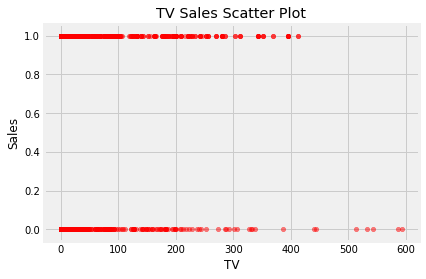

In [245]:
# Scatter Plot TV
# x = TV, y = Sales
train.plot(kind='scatter', x='ttl_grnd_flr', y='fr_yn',alpha = 0.5,color = 'red')
plt.xlabel('TV')              # label = name of label
plt.ylabel('Sales')
plt.title('TV Sales Scatter Plot')            # title = title of plot

In [11]:
train['ttl_ar'].max()

12351844.468

In [12]:
train['ttl_ar'].head()

0      69.42
1      46.29
2    2516.76
3      48.92
4       0.00
Name: ttl_ar, dtype: float64

In [13]:
train['ttl_ar'].mean()

2477.958209555566

In [14]:
bins = np.linspace(train.ttl_ar.min(), train.ttl_ar.max(), 20)
train['DIS_bin'] = np.digitize(train['ttl_ar'], bins)

In [15]:
train['DIS_bin'].unique()

array([ 1, 20,  2,  3], dtype=int64)

In [16]:
train.groupby('DIS_bin').count()

,fr_yn,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,...,fr_fghtng_fclt_spcl_css_6_yn,us_yn,dngrs_thng_yn,slf_fr_brgd_yn,blk_dngrs_thng_mnfctr_yn,cltrl_hrtg_yn,DT_hour,DT_day_week,DT_day_month,DT_M
DIS_bin,,,,,,,,,,,,,,,,,,,,,
1,59174,59174,59174,59174,59174,59174,59174,59174,48964,48169,...,59174,59174,59174,59174,59174,59174,59174,59174,59174,59174
2,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
3,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
20,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [17]:
train.groupby('DIS_bin').sum()

,fr_yn,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,...,fr_fghtng_fclt_spcl_css_6_yn,us_yn,dngrs_thng_yn,slf_fr_brgd_yn,blk_dngrs_thng_mnfctr_yn,cltrl_hrtg_yn,DT_hour,DT_day_week,DT_day_month,DT_M
DIS_bin,,,,,,,,,,,,,,,,,,,,,
1,7632.0,370853.0,257643.0,201957,3.005486e+07,9.119110e+07,4.933965e+08,152242803.0,150060.0,6015.0,...,-50743.0,-33099.0,-49422.0,-49428.0,-49427.0,-49427.0,691538.0,177078.0,930158.0,382903.0
2,17.0,191.0,231.0,568,3.998402e+06,1.956017e+07,0.000000e+00,146927.0,4565.0,145.0,...,-17.0,-17.0,-17.0,-17.0,-17.0,-17.0,234.0,56.0,257.0,135.0
3,6.0,30.0,90.0,1926,3.437388e+06,1.123769e+07,1.223390e+09,12996.0,1686.0,216.0,...,0.0,6.0,0.0,0.0,0.0,0.0,101.0,22.0,107.0,32.0
20,2.0,2.0,30.0,18,1.562887e+04,2.470369e+07,0.000000e+00,9712.0,118.0,8.0,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,12.0,8.0,33.0,15.0


In [18]:
train = train[train['DIS_bin'] == 1]

train.drop(['DIS_bin'], axis = 1, inplace = True)

In [246]:
bins = np.linspace(0,800000, 1000)
train['ttl_ar'] = np.digitize(train['ttl_ar'], bins)
bins = np.linspace(0,800000, 1000)
val['ttl_ar'] = np.digitize(val['ttl_ar'], bins)
bins = np.linspace(0,800000, 1000)
test['ttl_ar'] = np.digitize(test['ttl_ar'], bins)


In [20]:
train['']

In [21]:
# # Scatter Plot TV
# # x = TV, y = Sales
# train.plot(kind='scatter', x='ttl_grnd_flr', y='fr_yn',alpha = 0.5,color = 'red')
# plt.xlabel('TV')              # label = name of label
# plt.ylabel('Sales')
# plt.title('TV Sales Scatter Plot')            # title = title of plot

In [22]:
train['fr_yn'].unique()

array([1, 0], dtype=int64)

In [23]:

# df_all = pd.concat([data,train,val,test])

# categorical_cols = df_all.select_dtypes(['object']).columns
# for col in categorical_cols:
#     df_all[col] = pd.Categorical(df_all[col]).codes

In [24]:
# df_all['DT_hour'] = (df_all['dt_of_fr'].dt.hour).astype(np.int8)
# df_all['DT_day_week'] = (df_all['dt_of_fr'].dt.dayofweek).astype(np.int8)
# df_all['DT_day_month'] = (df_all['dt_of_fr'].dt.day).astype(np.int8)
# df_all['DT_M'] = (df_all['dt_of_fr'].dt.month).astype(np.int8)
# df_all = df_all.drop('dt_of_fr', axis = 1)

In [247]:
X_train = train.drop(['fr_yn'],axis = 1)
X_test = val.drop(['fr_yn'],axis = 1)
y_train = train['fr_yn']
y_test = val['fr_yn']
X = pd.concat([X_train,X_test])
y = pd.concat([y_train,y_test])

In [248]:

X_train.drop(['id'], axis = 1, inplace = True)
test.drop(['id'], axis = 1, inplace = True)
X_test.drop(['id'], axis = 1, inplace = True)

,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,bldng_us_clssfctn,...,fr_fghtng_fclt_spcl_css_6_yn,us_yn,dngrs_thng_yn,slf_fr_brgd_yn,blk_dngrs_thng_mnfctr_yn,cltrl_hrtg_yn,DT_hour,DT_day_week,DT_day_month,DT_M
0,-1,-1,3,0.000,1,0.0,20,NaN,NaN,-1,...,-1,-1,-1,-1,-1,-1,15,2,3,2
1,1,11,2,915.750,1,2660.0,19,1.0,0.0,1,...,-1,-1,-1,-1,-1,-1,18,3,17,3
2,-1,-1,5,5523.870,2,13607.0,20,9.0,0.0,-1,...,0,0,0,0,0,0,6,0,3,12
3,-1,-1,8,667.200,1,0.0,20,3.0,0.0,-1,...,-1,-1,-1,-1,-1,-1,23,6,29,3
4,-1,-1,7,1050.060,1,0.0,20,3.0,0.0,-1,...,-1,-1,-1,-1,-1,-1,11,1,17,5
5,6,15,1,123.780,1,284.0,19,2.0,0.0,6,...,-1,-1,-1,-1,-1,-1,17,1,13,12
6,0,15,1,138.110,1,283.0,18,4.0,0.0,6,...,-1,-1,-1,-1,-1,-1,4,0,11,8
7,6,10,1,85.960,1,0.0,15,1.0,0.0,6,...,-1,-1,-1,-1,-1,-1,13,5,11,1
8,6,7,2,136.470,1,1329.0,19,1.0,0.0,6,...,-1,-1,-1,-1,-1,-1,18,6,15,7
9,17,15,1,174.050,1,317.0,18,2.0,0.0,5,...,0,2,0,0,0,0,15,5,16,6


In [250]:
#모델 생성 및 학습
#for i in range(300):
    
    import lightgbm as lgb
    Lgb = lgb.LGBMClassifier(n_estimators=29, 
                             silent=False, 
                             random_state =10, 
                             max_depth=18,
                             num_leaves=128,
                             learning_rate = 0.1,
                             objective='binary',
                             metrics ='auc'
                            )
    model = Lgb.fit(X_train, y_train)

#test를 통한 모델 검증
    predictions = model.predict(X_test)
    proba = model.predict_proba(X_test)
    from sklearn.metrics import accuracy_score, roc_auc_score
    from sklearn.metrics import f1_score, recall_score
    score = roc_auc_score(y_test, predictions)
    score2 = accuracy_score(y_test, predictions)
    score3 = f1_score(y_test, predictions)
    score4 = recall_score(y_test, predictions)
#     print('roc_auc_score:',score)
#     print('accuracy_score:',score2)
    print((1)/100,":",'F1', score3)
    #print('recall', score4)

0.01 : F1 0.5148014440433213


In [39]:
predictions
#29
# roc_auc_score: 0.6914737170414987
# accuracy_score: 0.8153087851551174
#F1 0.5074750830564785

array([0, 0, 0, ..., 0, 0, 1], dtype=int8)

In [40]:
proba

array([[8.63597608e-01, 1.36402392e-01],
       [9.99997053e-01, 2.94707722e-06],
       [8.63618253e-01, 1.36381747e-01],
       ...,
       [9.28619866e-01, 7.13801338e-02],
       [7.92463305e-01, 2.07536695e-01],
       [4.41205862e-01, 5.58794138e-01]])

In [251]:
y = model.predict(test)
y_prob = model.predict_proba(test)


In [49]:
y_prob

array([[9.99997535e-01, 2.46466951e-06],
       [2.01446828e-01, 7.98553172e-01],
       [9.99996923e-01, 3.07727009e-06],
       ...,
       [8.85895661e-01, 1.14104339e-01],
       [7.04475316e-01, 2.95524684e-01],
       [5.53848974e-02, 9.44615103e-01]])

In [50]:
y

array([0, 1, 0, ..., 0, 0, 1], dtype=int8)

In [52]:
y_prob2

array([[9.99999938e-01, 6.17229811e-08],
       [7.35424038e-01, 2.64575962e-01],
       [9.99959758e-01, 4.02423327e-05],
       ...,
       [9.96727257e-01, 3.27274313e-03],
       [9.62001801e-01, 3.79981993e-02],
       [6.34868527e-02, 9.36513147e-01]])

In [47]:
y2 = model.predict(test)
y_prob2 = model.predict_proba(test)


In [68]:
a = pd.DataFrame((y_prob+ y_prob)/2)

In [69]:
a['tf'] = a[0] < a[1]

In [73]:
a['tf']

0       False
1        True
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15       True
16       True
17       True
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2927     True
2928    False
2929    False
2930    False
2931    False
2932     True
2933    False
2934    False
2935    False
2936    False
2937    False
2938    False
2939    False
2940    False
2941     True
2942    False
2943    False
2944    False
2945    False
2946    False
2947    False
2948     True
2949     True
2950    False
2951     True
2952    False
2953    False
2954    False
2955    False
2956     True
Name: tf, Length: 2957, dtype: bool

In [63]:
a['tf'] = a['tf'].map({False:'N',True:'Y'})

In [76]:
sub['fr_yn'] = a['tf']

In [252]:
sub['fr_yn'] = y
sub['fr_yn'] = sub['fr_yn'].map({0:'N', 1:'Y'})
sub.head()

,fr_yn
0,N
1,Y
2,N
3,N
4,N


In [253]:
sub.to_csv('tmddnjs94_화재예측과제_진우9파라미터.csv', index=False)

In [74]:
a['tf']
a['tf'] = pd.Categorical(a['tf']).codes

In [78]:
sub['fr_yn'] = sub['fr_yn'].map({0:'N', 1:'Y'})

In [85]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2957 entries, 0 to 2956
Data columns (total 1 columns):
fr_yn    2957 non-null object
dtypes: object(1)
memory usage: 23.2+ KB
